In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/ajwu/opt/anaconda3/lib/python3.8/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
exoplanet_df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
exoplanet_df = exoplanet_df.dropna(axis='columns', how='all')
# Drop the null rows
exoplanet_df = exoplanet_df.dropna()
exoplanet_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
exoplanet_df2 = exoplanet_df.drop("koi_disposition", axis = 1)
selected_features = exoplanet_df2.columns
selected_features

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# Model Selection: K Nearest Neighbors

In [6]:
# Assign exoplanet dataframe to X and y.
# Filtered X values down, eliminating features where the feature score was less than 0.02. 
# Use `koi_disposition` for the y values

X = exoplanet_df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_model_snr', 'koi_steff_err1',
       'koi_steff_err2','koi_kepmag']]

y = exoplanet_df["koi_disposition"]

In [7]:
# Apply One_Hot_Encoding for y.
from sklearn.preprocessing import LabelEncoder
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [8]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CO

------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE


Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
-----

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDA

------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class:

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original

------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------


Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIV

------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encod

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded 

Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE PO

Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE PO

In [9]:
from tensorflow.keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)



# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state = 42, test_size = 0.3)

In [11]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk_err1,koi_time0bk_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_model_snr,koi_steff_err1,koi_steff_err2,koi_kepmag
4954,0,0,0,0,97.942437,0.00888,-0.00888,2.5750,0.3300,-0.3300,100.2,-16.0,2.29,0.73,-1.09,7.8,206,-198,11.366
4235,0,0,1,1,16.609490,0.00715,-0.00715,3.1890,0.2280,-0.2280,272.9,-25.4,1.82,0.56,-0.28,12.7,189,-210,14.926
848,0,0,0,0,32.275385,0.01400,-0.01400,8.6220,0.5690,-0.5690,223.9,-15.2,2.31,0.35,-0.50,17.9,114,-103,14.167
2874,0,1,1,1,0.787120,0.00190,-0.00190,3.1648,0.0946,-0.0946,265.5,-7.3,23.81,2.81,-3.12,43.3,201,-201,14.964
3016,0,0,0,0,6.963527,0.00435,-0.00435,3.1920,0.1310,-0.1310,68.1,-4.5,1.40,0.34,-0.59,17.4,201,-201,13.128


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
#Scale/Normalize X_train and X_test.
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train Model_4 using K Nearest Neighbors



k: 1, Train/Test Score: 1.000/0.836
k: 3, Train/Test Score: 0.918/0.852
k: 5, Train/Test Score: 0.901/0.859
k: 7, Train/Test Score: 0.898/0.860
k: 9, Train/Test Score: 0.892/0.866
k: 11, Train/Test Score: 0.886/0.869
k: 13, Train/Test Score: 0.883/0.867
k: 15, Train/Test Score: 0.880/0.871
k: 17, Train/Test Score: 0.878/0.869
k: 19, Train/Test Score: 0.878/0.871
k: 21, Train/Test Score: 0.875/0.871
k: 23, Train/Test Score: 0.874/0.870
k: 25, Train/Test Score: 0.874/0.866
k: 27, Train/Test Score: 0.873/0.863
k: 29, Train/Test Score: 0.874/0.863
k: 31, Train/Test Score: 0.874/0.862
k: 33, Train/Test Score: 0.875/0.860
k: 35, Train/Test Score: 0.874/0.860
k: 37, Train/Test Score: 0.871/0.859
k: 39, Train/Test Score: 0.872/0.853


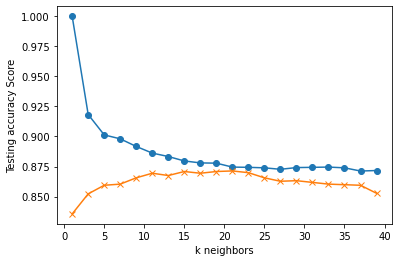

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
# increase k by increment of 2
for k in range(1, 40, 2):
    model_4 = KNeighborsClassifier(n_neighbors=k)
    model_4.fit(X_train_scaled, y_train)
    train_score = model_4.score(X_train_scaled, y_train)
    test_score = model_4.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Note that k: 19 provides the best accuracy where the classifier starts to stablize
from sklearn.neighbors import KNeighborsClassifier
model4_FINAL = KNeighborsClassifier(n_neighbors=19)
model4_FINAL.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model4_FINAL.score(X_train_scaled, y_train)}")
print('k=9 Test Acc: %.3f' % model4_FINAL.score(X_test_scaled, y_test))




#K Nearest Neighbor is a good model.  

Training Data Score: 0.8777845902309421
k=9 Test Acc: 0.871


# Save Model_4

In [18]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_4.sav'
joblib.dump(model_4, "Model_4.sav")

['Model_4.sav']